# Capstone Project Code

## Install two packages that we need

In [3]:
!conda install -c conda-forge geopy --yes

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\HP\Anaconda3

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.21.0               |             py_0          58 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          92 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-1.21.0-py_0




geographiclib-1.50   | 34 KB     |            |   0% 
geographiclib-1.50   | 34 KB     | ####7      |  47% 
geographiclib-1.50   | 34 KB     | #########4 |  94% 
geographiclib-1.50   | 34 KB     | ########## | 100% 

geopy-1.21.0         | 58 KB  

In [27]:
!conda install -c conda-forge folium=0.5.0 --yes

Solving environment: ...working... done

# All requested packages already installed.



## Import all libraries

In [32]:
from geopy.geocoders import Nominatim 
from pandas.io.json import json_normalize
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json 
import requests 
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from bs4 import BeautifulSoup
import xml
import folium
import numpy as np 

## Prepare Foursquare access

In [4]:
ClIENT_ID = 'F0XBSCQKMRC3WOLAQR0LSDDR14FN4KNKU1SEWTIKTBH2V23X' 
ClIENT_SECRET = 'GOUQVBKZLKI1HJKF5VSIJVLLDVJBV1K5R4RV2ZSZOZH5X1WG' 
VERSION = '20200204'
LIMIT =30
print('Your credentails:')
print('Foursquare_ID: ' + ClIENT_ID)
print('Foursquare_Secret:' + ClIENT_SECRET)

Your credentails:
Foursquare_ID: F0XBSCQKMRC3WOLAQR0LSDDR14FN4KNKU1SEWTIKTBH2V23X
Foursquare_Secret:GOUQVBKZLKI1HJKF5VSIJVLLDVJBV1K5R4RV2ZSZOZH5X1WG


In [7]:
city = 'Hangzhou,China'
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(city)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

30.2489634 120.2052342


## Collect info about stations around Hangzhou and clean the dataframe

In [9]:
search_query = 'station' 
radius = 5000
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'\
.format(ClIENT_ID, ClIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=F0XBSCQKMRC3WOLAQR0LSDDR14FN4KNKU1SEWTIKTBH2V23X&client_secret=GOUQVBKZLKI1HJKF5VSIJVLLDVJBV1K5R4RV2ZSZOZH5X1WG&ll=30.2489634,120.2052342&v=20200204&query=station&radius=5000&limit=30'

In [11]:
results = requests.get(url).json()

In [12]:
venues = results['response']['venues']
dataframe = json_normalize(venues)
dataframe

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d1fd931735', 'name': 'M...",False,54ced684498ec288178a2179,NaN,CN,杭州市,中国,NaN,323,"[杭州市, 浙江, 中国]","[{'label': 'display', 'lat': 30.24706171636902...",30.247062,120.207784,NaN,浙江,Citizen Center Metro Station (地铁市民中心站),v-1580869896
1,"[{'id': '4bf58dd8d48988d1fd931735', 'name': 'M...",False,54cedb18498e1886f9fa5781,NaN,CN,杭州市,中国,NaN,689,"[杭州市, 浙江, 中国]","[{'label': 'display', 'lat': 30.25239466884559...",30.252395,120.211201,NaN,浙江,Jiangjin Road Metro Station (地铁江锦路站),v-1580869896
2,"[{'id': '4bf58dd8d48988d129951735', 'name': 'T...",False,51d292a4498eab153ca8310b,1 Tiancheng Rd,CN,杭州市,中国,NaN,4985,"[1 Tiancheng Rd, 杭州市, 浙江, 中国]","[{'label': 'display', 'lat': 30.29366443503979...",30.293664,120.208347,NaN,浙江,Hangzhou East Railway Station (杭州东站),v-1580869896
3,"[{'id': '4bf58dd8d48988d1fd931735', 'name': 'M...",False,53038d4f498e0f0b33926b50,NaN,CN,杭州市,中国,NaN,1108,"[杭州市, 浙江, 中国]","[{'label': 'display', 'lat': 30.25825169554986...",30.258252,120.209398,NaN,浙江,Qianjiang Road Metro Station (地铁钱江路站),v-1580869896
4,"[{'id': '4bf58dd8d48988d1fd931735', 'name': 'M...",False,54ced68e498e6fa7b2821fe4,NaN,CN,杭州市,中国,NaN,855,"[杭州市, 浙江, 中国]","[{'label': 'display', 'lat': 30.24171767112886...",30.241718,120.202274,NaN,浙江,Chengxing Road Metro Station (地铁城星路站),v-1580869896
5,"[{'id': '4bf58dd8d48988d1fd931735', 'name': 'M...",False,50a8809ee4b02a7dc04936ba,Fuchun Rd | 富春路,CN,杭州市,中国,Wujiang Rd | 婺江路,2124,"[Fuchun Rd | 富春路 (Wujiang Rd | 婺江路), 杭州市, 浙江, 中国]","[{'label': 'display', 'lat': 30.23286563469672...",30.232866,120.193369,NaN,浙江,Jinjiang Metro Station (地铁近江站),v-1580869896
6,"[{'id': '4bf58dd8d48988d1fd931735', 'name': 'M...",False,595b25b235d3fc2a96b7955f,NaN,CN,杭州市,中国,NaN,1990,"[杭州市, 浙江, 310000, 中国]","[{'label': 'display', 'lat': 30.26017633535475...",30.260176,120.189105,310000,浙江,Qingling Road Metro Station (地铁庆菱路站),v-1580869896
7,"[{'id': '4bf58dd8d48988d129951735', 'name': 'T...",False,4b6d2744f964a52013692ce3,环城东路1号,CN,杭州市,中国,Metro Line 1,2615,"[环城东路1号 (Metro Line 1), 杭州市, 浙江, 中国]","[{'label': 'display', 'lat': 30.2460553413756,...",30.246055,120.178242,NaN,浙江,Hangzhou Railway Station (杭州站),v-1580869896
8,"[{'id': '4bf58dd8d48988d1fd931735', 'name': 'M...",False,54ced670498efcb642e217dc,NaN,CN,杭州市,中国,NaN,2048,"[杭州市, 浙江, 中国]","[{'label': 'display', 'lat': 30.26727912511506...",30.267279,120.203140,NaN,浙江,Jingfang Metro Station (地铁景芳站),v-1580869896
9,"[{'id': '4bf58dd8d48988d1fd931735', 'name': 'M...",False,5080f86fe4b0a7491bba6500,Yan'an Rd | 延安路,CN,杭州市,中国,Fengqi Rd (S) | 凤起路路口南侧,4799,"[Yan'an Rd | 延安路 (Fengqi Rd (S) | 凤起路路口南侧), 杭州...","[{'label': 'display', 'lat': 30.2652248765099,...",30.265225,120.159003,NaN,浙江,Fengqi Road Metro Station (地铁凤起路站),v-1580869896


In [25]:
clean_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')]+ ['id']
clean_dataframe = dataframe.loc[:,clean_columns]
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
clean_dataframe['categories'] = clean_dataframe.apply(get_category_type, axis=1)
clean_dataframe.columns = [column.split('.')[-1] for column in clean_dataframe.columns]
df1= clean_dataframe.drop(['cc', 'city', 'country', 'crossStreet', 'distance', 'formattedAddress','labeledLatLngs', 'id'], axis=1)
df1

,name,categories,address,lat,lng,postalCode,state
0,Citizen Center Metro Station (地铁市民中心站),Metro Station,NaN,30.247062,120.207784,NaN,浙江
1,Jiangjin Road Metro Station (地铁江锦路站),Metro Station,NaN,30.252395,120.211201,NaN,浙江
2,Hangzhou East Railway Station (杭州东站),Train Station,1 Tiancheng Rd,30.293664,120.208347,NaN,浙江
3,Qianjiang Road Metro Station (地铁钱江路站),Metro Station,NaN,30.258252,120.209398,NaN,浙江
4,Chengxing Road Metro Station (地铁城星路站),Metro Station,NaN,30.241718,120.202274,NaN,浙江
5,Jinjiang Metro Station (地铁近江站),Metro Station,Fuchun Rd | 富春路,30.232866,120.193369,NaN,浙江
6,Qingling Road Metro Station (地铁庆菱路站),Metro Station,NaN,30.260176,120.189105,310000,浙江
7,Hangzhou Railway Station (杭州站),Train Station,环城东路1号,30.246055,120.178242,NaN,浙江
8,Jingfang Metro Station (地铁景芳站),Metro Station,NaN,30.267279,120.203140,NaN,浙江
9,Fengqi Road Metro Station (地铁凤起路站),Metro Station,Yan'an Rd | 延安路,30.265225,120.159003,NaN,浙江


## Collect info about hotels around Hangzhou and clean the dataframe

In [21]:
search_query2 = 'hotel' 
radius = 5000
url2 = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'\
.format(ClIENT_ID, ClIENT_SECRET, latitude, longitude, VERSION, search_query2, radius, LIMIT)
url2

'https://api.foursquare.com/v2/venues/search?client_id=F0XBSCQKMRC3WOLAQR0LSDDR14FN4KNKU1SEWTIKTBH2V23X&client_secret=GOUQVBKZLKI1HJKF5VSIJVLLDVJBV1K5R4RV2ZSZOZH5X1WG&ll=30.2489634,120.2052342&v=20200204&query=hotel&radius=5000&limit=30'

In [22]:
results2 = requests.get(url2).json()

In [23]:
venues2 = results2['response']['venues']
dataframe2 = json_normalize(venues2)
dataframe2

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",False,4d4bef75f523a1433e4e709d,78 Qinchun E Rd | 庆春东路78号,CN,杭州市,中国,Kaixuan Rd | 凯旋路,2083,"[78 Qinchun E Rd | 庆春东路78号 (Kaixuan Rd | 凯旋路),...","[{'label': 'display', 'lat': 30.26006777374398...",30.260068,120.187794,NaN,310016,浙江,Amethyst Hotel (浙江紫晶大酒店 Amethyst Hotel),v-1580870676
1,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",False,5775e06b498e5a7c0d9bcd2c,NaN,CN,杭州市,中国,NaN,1865,"[杭州市, 浙江, 中国]","[{'label': 'display', 'lat': 30.25868755515396...",30.258688,120.221039,NaN,NaN,浙江,SORL Hotel Hangzhou (杭州瑞立江河汇酒店),v-1580870676
2,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",False,530b1eae498ef143b591957c,下城区延安路546号,CN,NaN,中国,NaN,1902,"[下城区延安路546号, 中国]","[{'label': 'display', 'lat': 30.24063676172339...",30.240637,120.187955,NaN,NaN,NaN,杭州大酒店 Hangzhou Hotel,v-1580870676
3,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",False,4d336ec8c6cba35d5fa82a7a,上城區西湖大道2號,CN,杭州市,中国,NaN,2674,"[上城區西湖大道2號, 杭州市, 浙江, 中国]","[{'label': 'display', 'lat': 30.24729728862251...",30.247297,120.177491,NaN,NaN,浙江,Hong Lou Hotel (杭州红楼大酒店),v-1580870676
4,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",False,56ee2e8d498eaa1cd78e942f,长寿路6号 |No.6 changshou Rd,CN,杭州市,中国,武林路,4907,"[长寿路6号 |No.6 changshou Rd (武林路), 杭州市, 浙江, 中国]","[{'label': 'display', 'lat': 30.26236323740315...",30.262363,120.156609,NaN,NaN,浙江,Shangri-La Hotel Hangzhou Midtown (杭州城中香格里拉大酒店),v-1580870676
5,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",False,5236199611d2db10b6d22147,上城区秋涛路264号,CN,NaN,中国,NaN,2216,"[上城区秋涛路264号, 中国]","[{'label': 'display', 'lat': 30.24045910207017...",30.240459,120.184398,NaN,NaN,NaN,云顶之星杭州店 Genting Star Hotel (Hangzhou),v-1580870676
6,"[{'id': '4bf58dd8d48988d1f8931735', 'name': 'B...",False,4f66bcfee4b03aa48f392b09,No. 136,CN,杭州市,中国,Kaixuan Road,2277,"[No. 136 (Kaixuan Road), 杭州市, 浙江, 310000, 中国]","[{'label': 'display', 'lat': 30.26039807668644...",30.260398,120.185587,NaN,310000,浙江,Evergreen Hotel (四季青大酒店),v-1580870676
7,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",False,50310096e4b04d70bf2208b5,上城区望江東路鯤鵬路363號,CN,杭州市,中国,杭州消防指挥中心北门,2409,"[上城区望江東路鯤鵬路363號 (杭州消防指挥中心北门), 杭州市, 浙江, 中国]","[{'label': 'display', 'lat': 30.23030987166434...",30.230310,120.192526,NaN,NaN,浙江,捷特漫大酒店 Giantman Hotel,v-1580870676
8,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",False,4bd7b26d304fce72e0e933ab,342 Xintang Road (Xintang Lu),CN,杭州市,中国,NaN,3266,"[342 Xintang Road (Xintang Lu), 杭州市, 浙江, 中国]","[{'label': 'display', 'lat': 30.27824620224151...",30.278246,120.203021,NaN,NaN,浙江,Huachen Kenzo Hotel Hangzhou (华辰银座酒店),v-1580870676
9,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",False,4bcf50a00ffdce724262b2c0,2 Pinghai Rd,CN,杭州市,中国,NaN,3861,"[2 Pinghai Rd, 杭州市, 浙江, 中国]","[{'label': 'display', 'lat': 30.25667395274765...",30.256674,120.166084,NaN,NaN,浙江,Grand Metro Park Hotel Hangzhou (杭州维景大酒店),v-1580870676


In [26]:
clean_columnsh= ['name', 'categories'] + [col for col in dataframe2.columns if col.startswith('location.')]+ ['id']
clean_dataframeh = dataframe2.loc[:,clean_columnsh]
clean_dataframeh['categories'] = clean_dataframeh.apply(get_category_type, axis=1)
clean_dataframeh.columns = [column.split('.')[-1] for column in clean_dataframeh.columns]
df2= clean_dataframeh.drop(['cc', 'city', 'country', 'crossStreet', 'distance', 'formattedAddress','labeledLatLngs', 'id'], axis=1)
df2

,name,categories,address,lat,lng,neighborhood,postalCode,state
0,Amethyst Hotel (浙江紫晶大酒店 Amethyst Hotel),Hotel,78 Qinchun E Rd | 庆春东路78号,30.260068,120.187794,NaN,310016,浙江
1,SORL Hotel Hangzhou (杭州瑞立江河汇酒店),Hotel,NaN,30.258688,120.221039,NaN,NaN,浙江
2,杭州大酒店 Hangzhou Hotel,Hotel,下城区延安路546号,30.240637,120.187955,NaN,NaN,NaN
3,Hong Lou Hotel (杭州红楼大酒店),Hotel,上城區西湖大道2號,30.247297,120.177491,NaN,NaN,浙江
4,Shangri-La Hotel Hangzhou Midtown (杭州城中香格里拉大酒店),Hotel,长寿路6号 |No.6 changshou Rd,30.262363,120.156609,NaN,NaN,浙江
5,云顶之星杭州店 Genting Star Hotel (Hangzhou),Hotel,上城区秋涛路264号,30.240459,120.184398,NaN,NaN,NaN
6,Evergreen Hotel (四季青大酒店),Bed & Breakfast,No. 136,30.260398,120.185587,NaN,310000,浙江
7,捷特漫大酒店 Giantman Hotel,Hotel,上城区望江東路鯤鵬路363號,30.230310,120.192526,NaN,NaN,浙江
8,Huachen Kenzo Hotel Hangzhou (华辰银座酒店),Hotel,342 Xintang Road (Xintang Lu),30.278246,120.203021,NaN,NaN,浙江
9,Grand Metro Park Hotel Hangzhou (杭州维景大酒店),Hotel,2 Pinghai Rd,30.256674,120.166084,NaN,NaN,浙江


## Create Map to visualize all the spots of hotels and stations 
### Stations(blue), hotels(red) 

In [30]:
hostmap = folium.Map(location=[latitude, longitude], zoom_start=14)

for lat, lng, name, categories, address in zip(df1['lat'], df1['lng'],df1['name'], df1['categories'],df1['address']):
    label = '{}, {}'.format(name, address)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.7,
        parse_html=False).add_to(hostmap)  
for lat, lng, name, categories, address in zip(df2['lat'], df2['lng'],df2['name'], df2['categories'],df2['address']):
    label = '{}, {}'.format(name, address)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.7,
        parse_html=False).add_to(hostmap) 
    
hostmap

## Explorative analysis (Scatter Plot) 

<function matplotlib.pyplot.show(*args, **kw)>

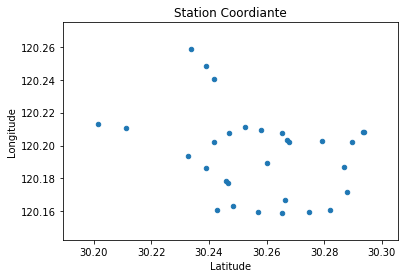

In [35]:
df1.plot(kind='scatter',x='lat',y='lng')
plt.title('Station Coordiante')
plt.xlabel('Latitude')
plt.ylabel('Longitude')

plt.show

<function matplotlib.pyplot.show(*args, **kw)>

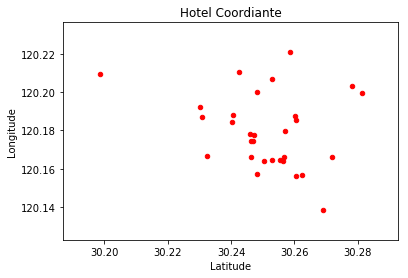

In [37]:
df2.plot(kind='scatter',x='lat',y='lng',c='red')
plt.title('Hotel Coordiante')
plt.xlabel('Latitude')
plt.ylabel('Longitude')

plt.show